# Burst Fitting example using BurstFit class

/home/ubuntu/gechen/software/filplot_funcs_gc.py:20: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


Secrets not found. Cannot use datacite API


2021-12-09 01:26:32,386 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2021-12-09 01:26:32,615 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2021-12-09 01:26:32,619 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2021-12-09 01:26:32,622 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (masked, masked)


64


2021-12-09 01:28:31,374 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2021-12-09 01:28:31,379 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 1
2021-12-09 01:28:31,406 - initial_profilefit -burstfit.fit - INFO - Converged parameters (profile fit) are:
2021-12-09 01:28:31,410 - initial_profilefit -burstfit.fit - INFO - S: 616.5570042719603 +- 29.045668269180563
2021-12-09 01:28:31,422 - initial_profilefit -burstfit.fit - INFO - mu_t: 189.63151980471997 +- 0.19389976761091213
2021-12-09 01:28:31,432 - initial_profilefit -burstfit.fit - INFO - sigma_t: 1.351143688528958 +- 0.157944417353334
2021-12-09 01:28:31,435 - initial_profilefit -burstfit.fit - INFO - tau: 1.708089701376779 +- 0.3511571671203643


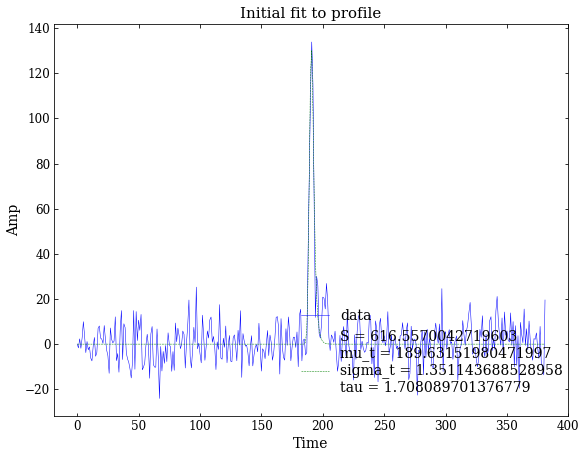

2021-12-09 01:28:31,756 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2021-12-09 01:28:31,760 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1
2021-12-09 01:28:31,771 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2021-12-09 01:28:31,774 - initial_spectrafit -burstfit.fit - INFO - mu_f: 27.257221857820817 +- 4.791575263449345
2021-12-09 01:28:31,776 - initial_spectrafit -burstfit.fit - INFO - sigma_f: 19.916568878902883 +- 3.9820764590961995


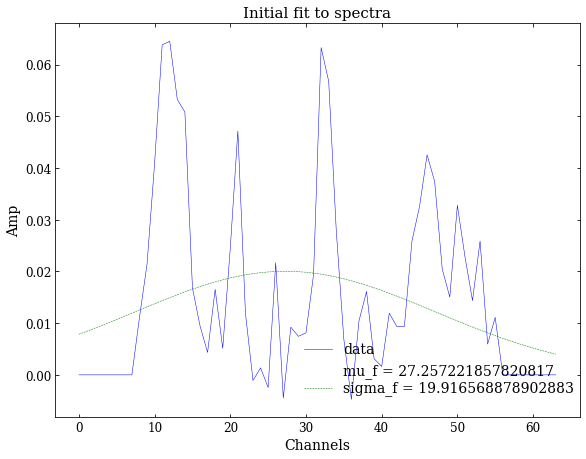

2021-12-09 01:28:31,998 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2021-12-09 01:28:32,001 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [27.257221857820817, 19.916568878902883, 616.5570042719603, 189.63151980471997, 1.351143688528958, 1.708089701376779, 56.2]
2021-12-09 01:28:32,548 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2021-12-09 01:28:32,552 - sgram_fit -burstfit.fit - INFO - mu_f: 36.016156097796724 +- 1.3398922159509659
2021-12-09 01:28:32,554 - sgram_fit -burstfit.fit - INFO - sigma_f: 24.066473802638278 +- 1.1677985007956044
2021-12-09 01:28:32,557 - sgram_fit -burstfit.fit - INFO - S: 804.666740593227 +- 14.927619648293765
2021-12-09 01:28:32,559 - sgram_fit -burstfit.fit - INFO - mu_t: 188.73005011705925 +- 0.18741107021177322
2021-12-09 01:28:32,561 - sgram_fit -burstfit.fit - INFO - sigma_t: 1.2689940453378854 +- 0.05640546819164978
2021-12-09 01:28:32,564 - sgram_fit -burstfit.fit - INFO - tau: 

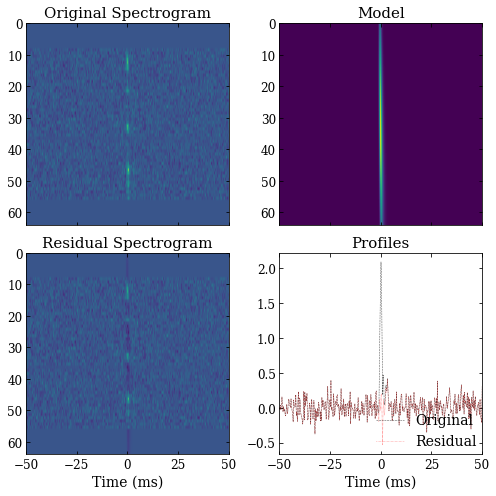

2021-12-09 01:28:33,186 - model -burstfit.fit - INFO - Making model.
2021-12-09 01:28:33,231 - model -burstfit.fit - INFO - Found 1 components.
2021-12-09 01:28:33,245 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2021-12-09 01:28:33,248 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2021-12-09 01:28:33,251 - model -burstfit.fit - INFO - Making model.
2021-12-09 01:28:33,254 - model -burstfit.fit - INFO - Found 1 components.
2021-12-09 01:28:33,275 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.037490874863691
2021-12-09 01:28:33,279 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2021-12-09 01:28:33,283 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2021-12-09 01:28:33,294 - tests -root - INFO - P values: T-test (0.55144), Kruskal (0.35204), KS (0.73246), F-test (0.95659)
2021-12-09 01:28:33,297 - run_

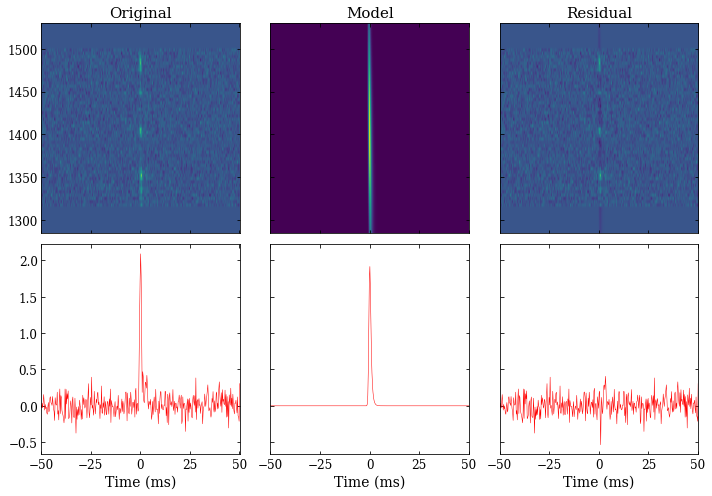

In [1]:
from burstfit.fit import BurstFit
from burstfit.data import BurstData
from burstfit.model import Model, SgramModel
from burstfit.utils.plotter import plot_me
from burstfit.utils.functions import pulse_fn_vec, sgram_fn_vec, sgram_fn, gauss_norm, gauss_2d
from burstfit.utils.plotter import plot_fit_results, plot_2d_fit 
from burstfit.io import BurstIO
import logging
import numpy as np
import math
import matplotlib.pyplot as plt
# use Liam's function to read in filterbank files 
import sys
sys.path.insert(1, '/home/ubuntu/gechen/software')
import filplot_funcs_gc as ff

#from burstfit.utils.functions import gauss_norm2, pulse_fn_vec, sgram_fn_vec 
%matplotlib inline 


# input variables 
fil_file ='/data/dsa110/T1/corr09/2021_10_8_0_29_27/fil_211009aacy/211009aacy_174.fil'
save_name = '211009aacy_174'
save_dir = '/home/ubuntu/gechen/burstfit_tests_outputs/' 
dm_heimdall = 56.2
width_heimdall = 4 
snr_heimdall = 27.0 
mask_chans=[] 

# = float(eval(sys.argv[1]))
# = int(sys.argv[7])


logging_format = "%(asctime)s - %(funcName)s -%(name)s - %(levelname)s - %(message)s"
logging.basicConfig(
    level=logging.INFO,
    format=logging_format,
)
# create burst object 
bd = BurstData(
    fp=fil_file,
    dm=dm_heimdall ,
    tcand=0.5, # pulse starting time in s.
    width=width_heimdall,  
    snr=snr_heimdall
)
bd.prepare_data()

# number of channels after binning 
# requires each channel bin to have SNR_min 
# snr_heimdall was calculated with all 256 channels binned into one 
SNR_min = 3 
n_per_bin = int(256 / (snr_heimdall / SNR_min)**2) 
if not math.log(n_per_bin, 2).is_integer():
    n_per_bin = 2 ** (int(np.log2(n_per_bin))+1)
nfreq = int(256 / n_per_bin) 
print(nfreq)
    
# read in data 
data = ff.proc_cand_fil(fil_file, bd.dm, bd.width, nfreq_plot=nfreq, ndm=64)[0]
# zoom in close to the burst 
data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)]
    
# fit models  
# For pulse, we will use a gaussian convolved with an exponential model 
# S: Area of the pulse (fluence)
# mu: means of gaussians for each channel
# sigma: sigma of gaussian
# tau: scattering timescale for each channel
pnames = ['S', 'mu_t', 'sigma_t', 'tau']
pulseModel = Model(pulse_fn_vec, param_names=pnames)

# For spectra, we will use a normalized gaussian model  
snames = ['mu_f', 'sigma_f']
spectraModel = Model(gauss_norm, param_names=snames)


sgram_mask = np.full(np.shape(data_burst), False)
#sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
#                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

#sgram_bounds=((0, 0.45, 0, -np.inf),(np.inf, 0.55, np.inf, np.inf)) # did not work when only set up bounds but do not chop data 

# Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# initial fit: use heimdall results 
bf = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, 
    width=width_heimdall,
    dm=dm_heimdall,
    foff=bd.foff * 1024 / nfreq,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False
)

# Some setting up before we do the fitting 
bf.validate()
bf.precalc()

bf.fitcycle(plot=True)
# fit all componnts 
bf.fitall(plot=False) 
bf.calc_redchisq()
plot_fit_results(bf.sgram, bf.sgram_model.evaluate, bf.sgram_params['all'][1]['popt'], 
                 bf.tsamp, bf.fch1, bf.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
#dm_fit, dm_fit_err = bf.sgram_params['all'][1]['popt'][-1], bf.sgram_params['all'][1]['perr'][-1]



expected despersion in tsamp: -28.98992157782192


2021-12-09 18:44:38,005 - model -burstfit.fit - INFO - Making model.
2021-12-09 18:44:38,009 - model -burstfit.fit - INFO - Found 2 components.


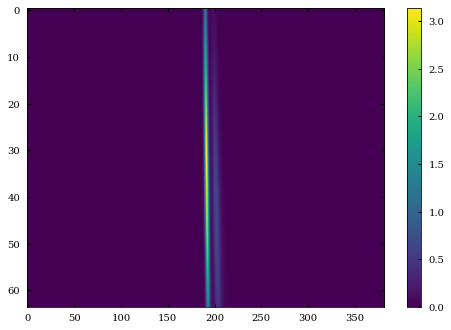

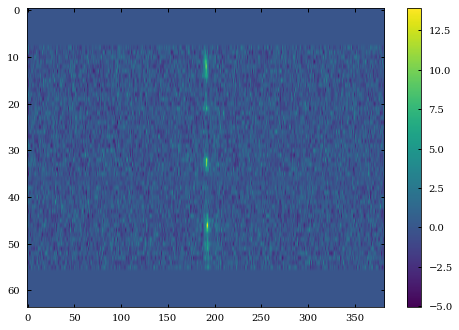

{1: {'popt': [36.016156097796724,
   24.066473802638278,
   804.666740593227,
   188.73005011705925,
   1.2689940453378854,
   1.4152535455095614,
   56.85209014549289],
  'perr': array([ 1.33989222,  1.1677985 , 14.92761965,  0.18741107,  0.05640547,
          0.06391641,  0.12401647])},
 2: {'popt': [39.37651989727522,
   18.775211667603706,
   127.0972522842487,
   198.23794359972717,
   1.3412429130366916,
   0.2886725200396866,
   58.44417043701889],
  'perr': array([4.47758351, 4.03304403, 8.36230053, 0.75306724, 0.13250437,
         0.07489977, 0.44115199])},
 'all': {1: {'popt': [36.016156097796724,
    24.066473802638278,
    804.666740593227,
    188.73005011705925,
    1.2689940453378854,
    1.4152535455095614,
    56.85209014549289],
   'perr': array([ 1.33914661,  1.16731607, 14.91735054,  0.18731775,  0.05642345,
           0.06398348,  0.12395661])},
  2: {'popt': [39.37651989727522,
    18.775211667603706,
    127.0972522842487,
    198.23794359972717,
    1.3412429130

In [27]:
#plot_me(bf.model[:,int(382/2-30): int(382/2+30)]) 
#bd.tsamp*3*1e3

print('expected despersion in tsamp:', 4.149e3*10*(1/1530**2 - 1/1280**2) / bd.tsamp) 

plot_me(bf.model)

plot_me(bf.sgram)

bf.sgram_params

2021-12-09 01:28:38,841 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2021-12-09 01:28:38,844 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [3.60161561e+01 2.40664738e+01 8.04666741e+02 1.88730050e+02
 1.26899405e+00 1.41525355e+00 5.68520901e+01 3.93765199e+01
 1.87752117e+01 1.27097252e+02 1.98237944e+02 1.34124291e+00
 2.88672520e-01 5.84441704e+01]
2021-12-09 01:28:38,848 - set_initial_pos -burstfit.mcmc - WARNING - Number of walkers is less than 2*ndim. Setting nwalkers to 2*ndim+1.
2021-12-09 01:28:38,851 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2021-12-09 01:28:38,853 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2021-12-09 01:28:38,855 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2021-12-09 01:28:38,857 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of

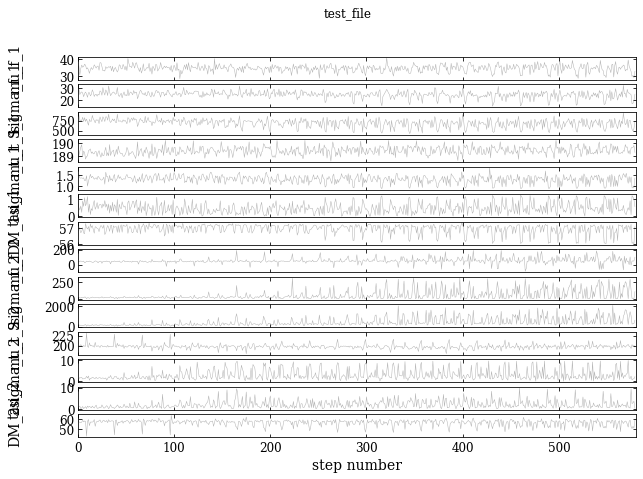

<Figure size 432x288 with 0 Axes>

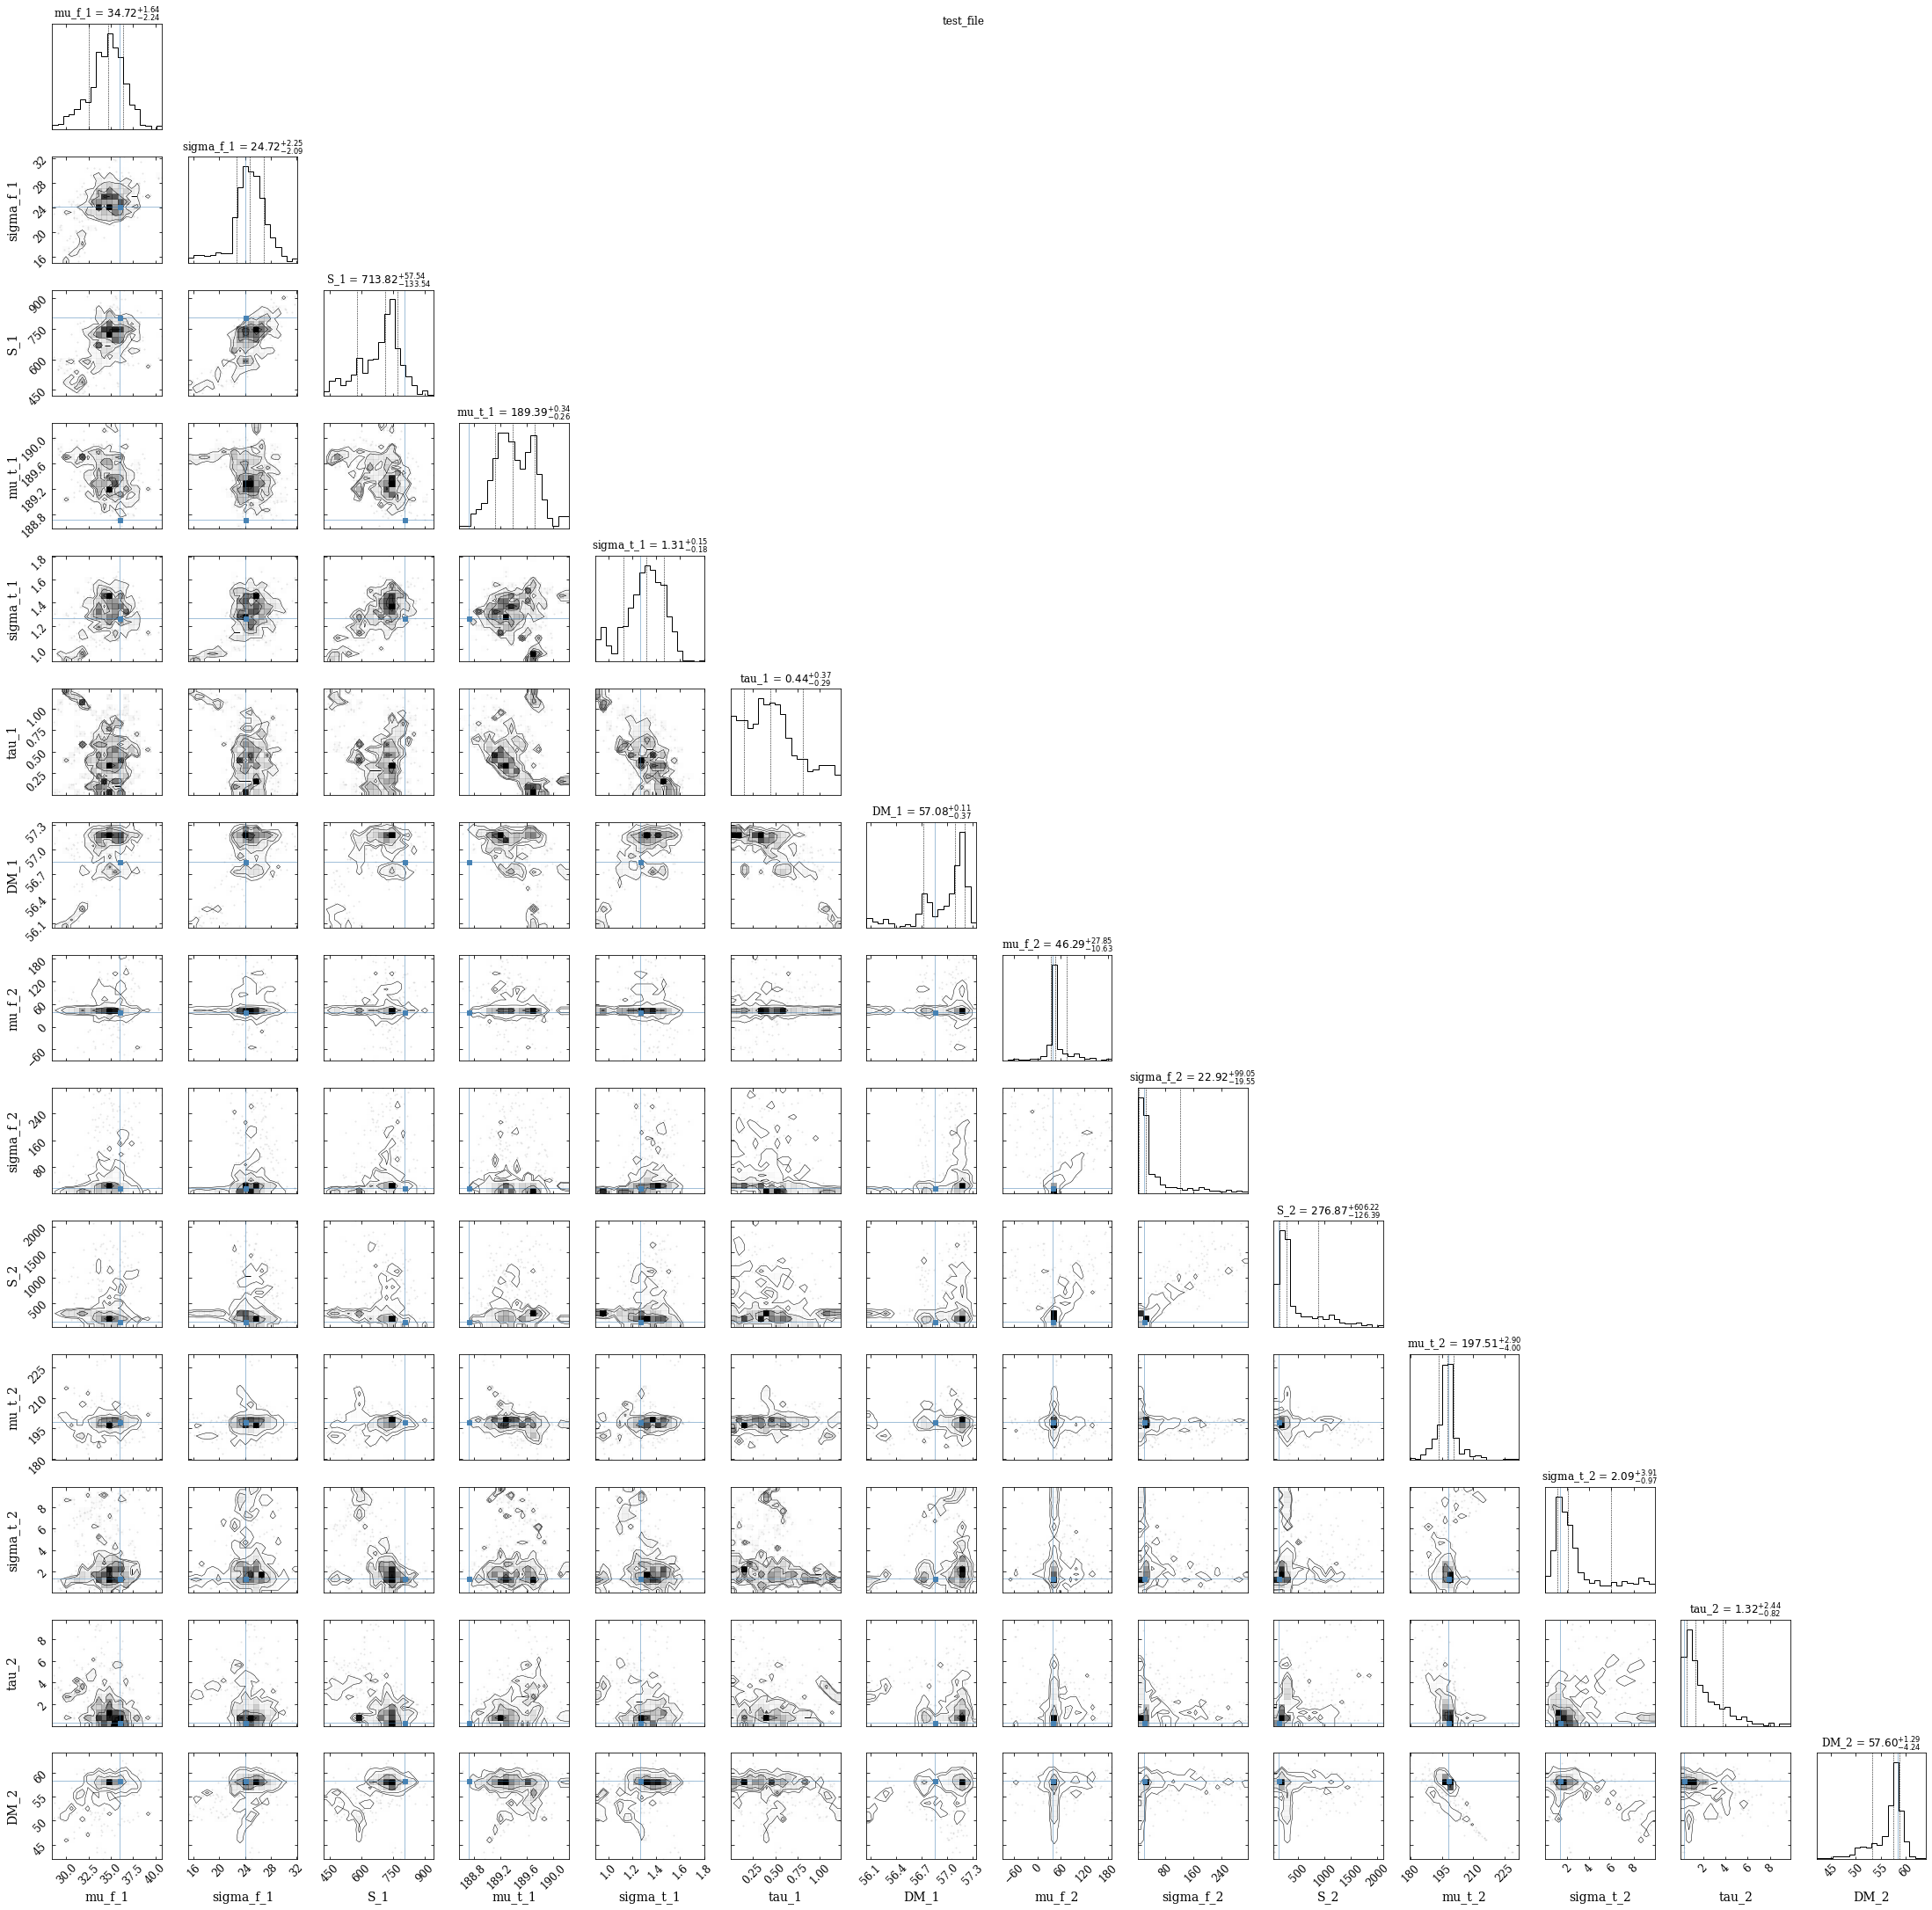

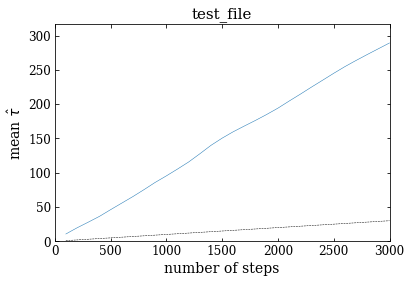

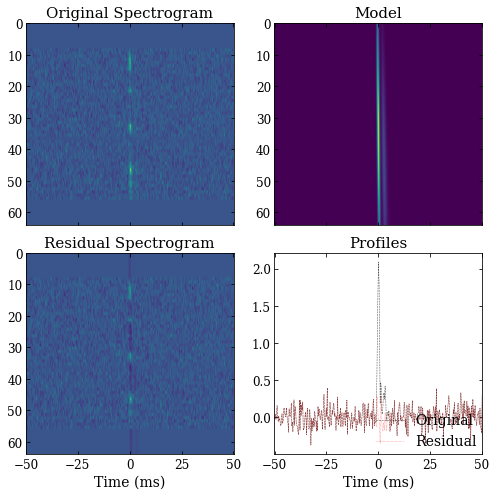

In [4]:
# MCMC 
# use larger nsteps later. 
mcmc_kwargs = {}
mcmc_kwargs = {'nwalkers':20, 'nsteps':3000,
           'skip':500, 'ncores':4, 
           'start_pos_dev':0.01,
           'prior_range':0.8, 
           'save_results':True,
           'outname':'test_file'}

bf.run_mcmc(plot=True, **mcmc_kwargs)



In [5]:
# save fitting results 
bio = BurstIO(bf, bd)
d = bio.save_results(outname=save_name+"_fit_results.json", outdir=save_dir)  

2021-12-09 01:36:45,783 - set_attributes_to_save -burstfit.io - INFO - Setting attributes to be saved.
2021-12-09 01:36:45,785 - set_attributes_to_save -burstfit.io - INFO - Reading attributes from BurstData object.
2021-12-09 01:36:45,787 - set_attributes_to_save -burstfit.io - INFO - Reading attributes from BurstFit object.
2021-12-09 01:36:45,789 - set_attributes_to_save -burstfit.io - INFO - Copied necessary attributes
2021-12-09 01:36:45,791 - save_results -burstfit.io - INFO - Preparing dictionary to be saved.
2021-12-09 01:36:45,793 - save_results -burstfit.io - INFO - Writing JSON file: /home/ubuntu/gechen/burstfit_tests_outputs//211009aacy_174_fit_results.json.


In [6]:
# do not delete this cell. 
# fit again using the new DM result dm_fit
# data, datadm, tsdm0, dms, datadm0 = ff.proc_cand_fil(fil_file, dm_fit, bd.width, nfreq_plot=nfreq, ndm=32)
# data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)]
# bf.sgram = data_burst
# bf.dm = dm_fit
# bd.dm = dm_fit 

# plt.plot(range(len(data_burst.mean(0))), data_burst.mean(0))
# plt.xlabel('Time Sample using new DM')

# bf.fitall(plot=False)
# plot_fit_results(bf.sgram, bf.sgram_model.evaluate, bf.sgram_params['all'][1]['popt'], 
#                  bf.tsamp, bf.fch1, bf.foff, show=True, save=True, outname=save_name+'2d_fit_res'+'_dm_burstfit', outdir=save_dir)


In [7]:
bf.mcmc_params
d['param_names']

['mu_f', 'sigma_f', 'S', 'mu_t', 'sigma_t', 'tau', 'DM']

In [8]:
# saving key burst paramters 
mu_f_mcmc, sigma_f_mcmc, s_mcmc, mu_t_mcmc, sigma_t_mcmc, tau_mcmc, dm_mcmc = bf.mcmc_params[1]['popt']
mu_f_mcmc_err, sigma_f_mcmc_err, s_mcmc_err, mu_t_mcmc_err, sigma_t_mcmc_err, tau_mcmc_err, dm_mcmc_err = bf.mcmc_params[1]['perr']

t0 = 0.45 + mu_t_mcmc * bd.tsamp
t0_err = [i * bd.tsamp for i in mu_t_mcmc_err] 

width_ms = sigma_t_mcmc * bd.tsamp * 1e3 # in ms
width_ms_err = [i * bd.tsamp for i in sigma_t_mcmc_err] 

# with open(save_dir+save_name+"_fit_key_results.txt") as f:
#     print('mu_f_mcmc, sigma_f_mcmc, s_mcmc, mu_t_mcmc, sigma_t_mcmc, tau_mcmc, dm_mcmc')
#     print(bf.mcmc_params[1]['popt'])
#     print('lower, upper bounds')
#     print(bf.mcmc_params[1]['perr'])

#outname=save_name+"_fit_results.json", outdir=save_dir

In [9]:
rms_res = np.sqrt(sum(bf.residual.mean(0)**2) / len(bf.residual.mean(0)))

rms_res = np.sqrt(sum(data.mean(0)**2) / len(data.mean(0)))

snr = max(bf.model.mean(0)) / rms_res 

2021-12-09 01:36:45,864 - model -burstfit.fit - INFO - Making model.
2021-12-09 01:36:45,867 - model -burstfit.fit - INFO - Found 2 components.


In [10]:
print(np.sqrt(sum(data.mean(0)**2) / len(data.mean(0))))
print(np.sqrt(sum(bf.residual.mean(0)**2) / len(bf.residual.mean(0))))
print(max(data.mean(0)))

0.13166520288529085
0.12735136575128936
2.0913754


In [11]:
sum(bf.residual.mean(0)**2) / len(bf.residual.mean(0))
dm_mcmc
sigma_t_mcmc

1.3146387090018075

In [12]:
data_mcmc_dm = ff.proc_cand_fil(fil_file, dm_mcmc, sigma_f_mcmc, nfreq_plot=nfreq, ndm=32)[0]


In [13]:
#snr_himdall?  
max(data_mcmc_dm.mean(0)) / np.sqrt(sum(data_mcmc_dm.mean(0)**2) / len(data_mcmc_dm.mean(0)))



19.496721251245564

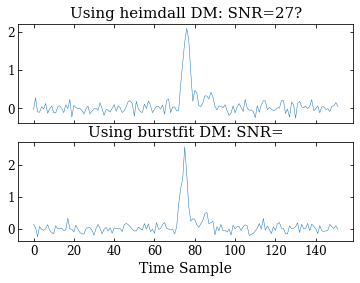

In [14]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(range(len(data.mean(0)[int(0.48/bd.tsamp): int(0.52/bd.tsamp)])), data.mean(0)[int(0.48/bd.tsamp): int(0.52/bd.tsamp)])
ax[0].set_title('Using heimdall DM: SNR=%d?'%bd.snr)

ax[1].plot(range(len(data_mcmc_dm.mean(0)[int(0.48/bd.tsamp): int(0.52/bd.tsamp)])), data_mcmc_dm.mean(0)[int(0.48/bd.tsamp): int(0.52/bd.tsamp)])
ax[1].set_xlabel('Time Sample')
ax[1].set_title('Using burstfit DM: SNR=')
fig.savefig(save_name + 'burst.pdf')

In [15]:
bf.mcmc_params

{1: {'popt': [34.72134312560462,
   24.71544669059412,
   713.8233758113065,
   189.38692613697327,
   1.3146387090018075,
   0.4418329644190792,
   57.0845226662085],
  'perr': [[2.2393199823297323, 1.63740002607328],
   [2.0865009356014212, 2.248841688619631],
   [133.53706221903747, 57.537751714257524],
   [0.26434515729457075, 0.34149281842857704],
   [0.18480642939862135, 0.1480976728880221],
   [0.28851845236992885, 0.36658570757149495],
   [0.3728330286875803, 0.1130074078419625]]},
 2: {'popt': [46.29319589693267,
   22.918731025923602,
   276.86776318441184,
   197.50964172990624,
   2.0895624208221477,
   1.3175718085945012,
   57.59576401624233],
  'perr': [[10.632029399376847, 27.845997169013245],
   [19.54600814591262, 99.04956618257633],
   [126.38579643445328, 606.2178443357567],
   [3.9964101579998044, 2.899444640338942],
   [0.9662910842258672, 3.9089852646945786],
   [0.824371102630246, 2.4353696021511357],
   [4.243903666711105, 1.287938256302425]]}}

In [16]:
len(data_burst.mean(0))

382